Exercise 1

Exercise 2

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline


G = nx.DiGraph()


edges = [
    ('o', 'a', 3),  
    ('a', 'd', 3),  
    ('o', 'b', 3),  
    ('b', 'c', 3),  
    ('c', 'd', 2),  
    ('a', 'b', 1),  
]

for u, v, cap in edges:
    G.add_edge(u, v, capacity=cap)


source = 'o'
sink = 'd'


all_nodes = set(G.nodes())
intermediate_nodes = all_nodes - {source, sink}

cuts = []

for r in range(len(intermediate_nodes) + 1):
    for subset in combinations(intermediate_nodes, r):
        
        U = {source} | set(subset)
        U_complement = all_nodes - U
        
        capacity = 0
        cut_edges = []
        
        for i in U:
            for j in U_complement:
                if G.has_edge(i, j):
                    cap = G[i][j]['capacity']
                    capacity += cap
                    cut_edges.append((i, j, cap))
        
        cuts.append({
            'U': sorted(list(U)),
            'U_C': sorted(list(U_complement)),
            'capacity': capacity,
            'edges': cut_edges
        })

cuts.sort(key=lambda x: x['capacity'])

for idx, cut in enumerate(cuts, 1):
    print(f"Cut {idx}:")
    print(f"  U = {cut['U']}, U^C = {cut['U_C']}")
    print(f"  C_U = {cut['capacity']}")
    if cut['edges']:
        print(f"  Edges: {' + '.join([f'({u},{v})' for u, v, _ in cut['edges']])}")
    print()


min_cut = cuts[0]

print("MINIMUM CUT:")
print(f"U = {min_cut['U']}, U^C = {min_cut['U_C']}")
print(f"Minimum cut capacity: {min_cut['capacity']}")


max_flow_value, flow_dict = nx.algorithms.flow.maximum_flow(G, source, sink)
print("MAXIMUM FLOW:")
print(f"Maximum throughput: {max_flow_value}")



Cut 1:
  U = ['b', 'c', 'o'], U^C = ['a', 'd']
  C_U = 5
  Edges: (o,a) + (c,d)

Cut 2:
  U = ['a', 'b', 'c', 'o'], U^C = ['d']
  C_U = 5
  Edges: (a,d) + (c,d)

Cut 3:
  U = ['o'], U^C = ['a', 'b', 'c', 'd']
  C_U = 6
  Edges: (o,a) + (o,b)

Cut 4:
  U = ['b', 'o'], U^C = ['a', 'c', 'd']
  C_U = 6
  Edges: (o,a) + (b,c)

Cut 5:
  U = ['a', 'b', 'o'], U^C = ['c', 'd']
  C_U = 6
  Edges: (a,d) + (b,c)

Cut 6:
  U = ['a', 'o'], U^C = ['b', 'c', 'd']
  C_U = 7
  Edges: (o,b) + (a,d) + (a,b)

Cut 7:
  U = ['c', 'o'], U^C = ['a', 'b', 'd']
  C_U = 8
  Edges: (o,a) + (o,b) + (c,d)

Cut 8:
  U = ['a', 'c', 'o'], U^C = ['b', 'd']
  C_U = 9
  Edges: (o,b) + (a,d) + (a,b) + (c,d)

MINIMUM CUT:
U = ['b', 'c', 'o'], U^C = ['a', 'd']
Minimum cut capacity: 5
MAXIMUM FLOW:
Maximum throughput: 5


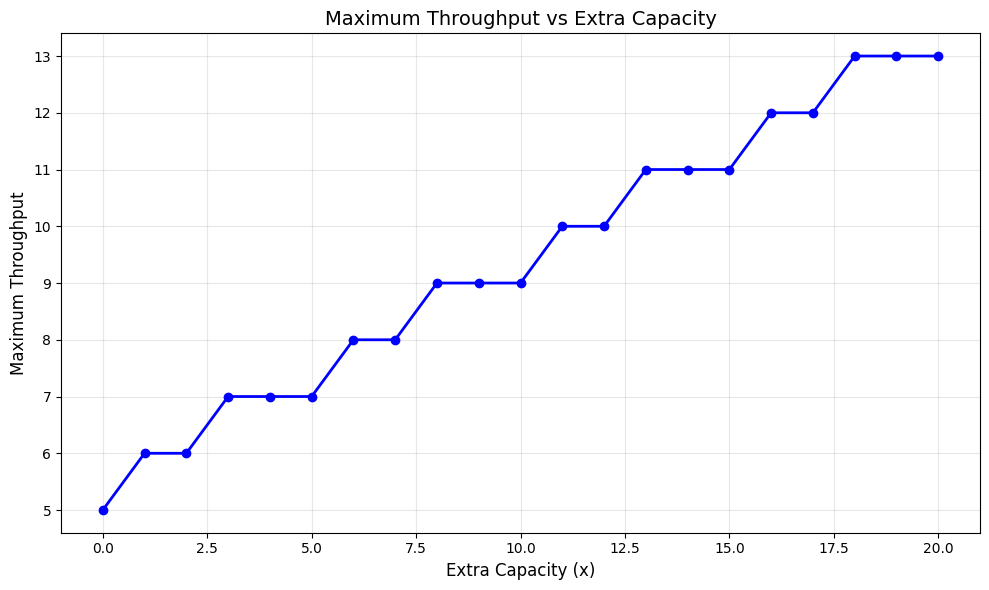

In [13]:

edge_definitions = [
    ('o', 'a', 'c1', 3),
    ('a', 'd', 'c2', 3),
    ('o', 'b', 'c3', 3),
    ('b', 'c', 'c4', 3),
    ('c', 'd', 'c5', 2),
    ('a', 'b', 'c6', 1),
]

original_capacities = {edge[2]: edge[3] for edge in edge_definitions}

max_x = 20
results_b = []

for x in range(max_x + 1):
    
    current_capacities = original_capacities.copy()
    extra_distributed = {edge_name: 0 for edge_name in original_capacities.keys()}
    
    remaining = x
    
    while remaining > 0:
        
        G_temp = nx.DiGraph()
        for from_node, to_node, edge_name, _ in edge_definitions:
            G_temp.add_edge(from_node, to_node, 
                          capacity=current_capacities[edge_name], 
                          name=edge_name)
        
        cut_val, part = nx.minimum_cut(G_temp, source, sink)
        S_temp, T_temp = part
        
        current_cut_edges = []
        for u in S_temp:
            for v in T_temp:
                if G_temp.has_edge(u, v):
                    edge_name = G_temp[u][v]['name']
                    capacity = G_temp[u][v]['capacity']
                    current_cut_edges.append((u, v, edge_name, capacity))
        
        if not current_cut_edges:
            break
        
        current_cut_edges.sort(key=lambda e: current_capacities[e[2]])
        
        smallest_edge = current_cut_edges[0]
        edge_name = smallest_edge[2]
        current_capacities[edge_name] += 1
        extra_distributed[edge_name] += 1
        remaining -= 1
    
    G_final = nx.DiGraph()
    for from_node, to_node, edge_name, _ in edge_definitions:
        G_final.add_edge(from_node, to_node, capacity=current_capacities[edge_name])
    
    max_flow = nx.maximum_flow_value(G_final, source, sink)
    
    results_b.append({
        'x': x,
        'max_flow': max_flow,
        'distribution': extra_distributed.copy(),
        'final_capacities': current_capacities.copy()
    })



plt.figure(figsize=(10, 6))
x_values = [r['x'] for r in results_b]
flow_values = [r['max_flow'] for r in results_b]
plt.plot(x_values, flow_values, 'b-o', linewidth=2, markersize=6)
plt.xlabel('Extra Capacity (x)', fontsize=12)
plt.ylabel('Maximum Throughput', fontsize=12)
plt.title('Maximum Throughput vs Extra Capacity', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


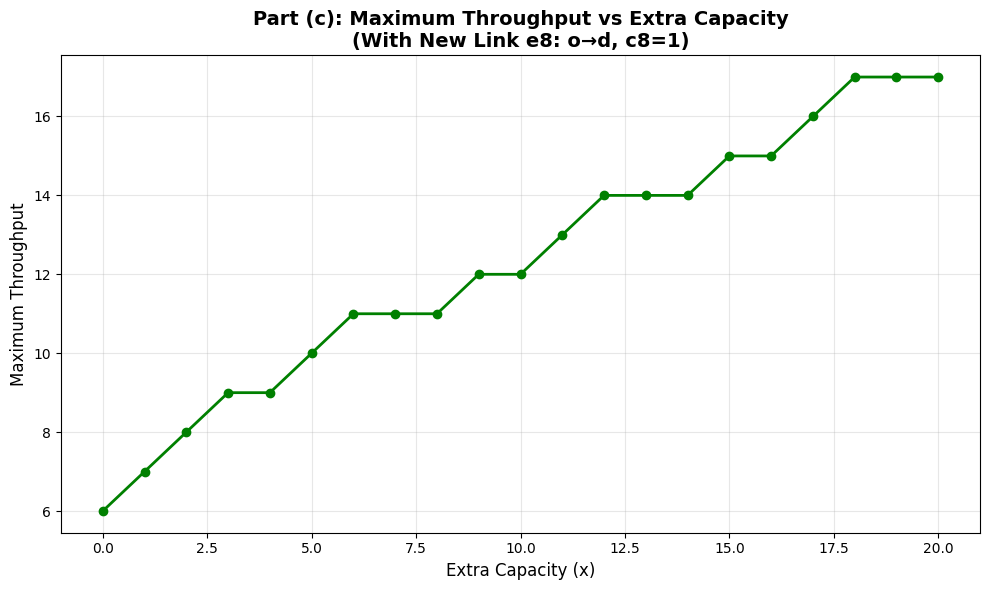

In [14]:


new_link_from = 'o'
new_link_to = 'd'


edge_definitions_with_e8 = edge_definitions + [(new_link_from, new_link_to, 'c8', 1)]
capacities_with_e8 = {edge[2]: edge[3] for edge in edge_definitions_with_e8}

results_c = []

for x in range(max_x + 1):
    
    current_capacities = capacities_with_e8.copy()
    extra_distributed = {edge_name: 0 for edge_name in capacities_with_e8.keys()}
    
    remaining = x
    
    while remaining > 0:
        
        G_temp = nx.DiGraph()
        for from_node, to_node, edge_name, _ in edge_definitions_with_e8:
            G_temp.add_edge(from_node, to_node, 
                          capacity=current_capacities[edge_name], 
                          name=edge_name)
    
        cut_val, part = nx.minimum_cut(G_temp, source, sink)
        S_temp, T_temp = part
        
      
        current_cut_edges = []
        for u in S_temp:
            for v in T_temp:
                if G_temp.has_edge(u, v):
                    edge_name = G_temp[u][v]['name']
                    capacity = G_temp[u][v]['capacity']
                    current_cut_edges.append((u, v, edge_name, capacity))
        
        if not current_cut_edges:
            break
        
     
        current_cut_edges.sort(key=lambda e: current_capacities[e[2]])
        
       
        smallest_edge = current_cut_edges[0]
        edge_name = smallest_edge[2]
        current_capacities[edge_name] += 1
        extra_distributed[edge_name] += 1
        remaining -= 1
    
   
    G_final = nx.DiGraph()
    for from_node, to_node, edge_name, _ in edge_definitions_with_e8:
        G_final.add_edge(from_node, to_node, capacity=current_capacities[edge_name])
    
    max_flow = nx.maximum_flow_value(G_final, source, sink)
    
    results_c.append({
        'x': x,
        'max_flow': max_flow,
        'new_link': f"{new_link_from} → {new_link_to}",
        'distribution': extra_distributed.copy(),
        'final_capacities': current_capacities.copy()
    })


plt.figure(figsize=(10, 6))
x_values = [r['x'] for r in results_c]
flow_values_c = [r['max_flow'] for r in results_c]
plt.plot(x_values, flow_values_c, 'g-o', linewidth=2, markersize=6)
plt.xlabel('Extra Capacity (x)', fontsize=12)
plt.ylabel('Maximum Throughput', fontsize=12)
plt.title(f'Part (c): Maximum Throughput vs Extra Capacity\n(With New Link e8: {new_link_from}→{new_link_to}, c8=1)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

